### 50_Startup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data1= pd.read_csv("50_Startups.csv")
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [3]:
#Check shape of dataset
data1.shape

(50, 5)

In [4]:
#Missing value
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#check for missing values
data1.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
#Count of duplicated rows
data1[data1.duplicated()].shape

(0, 5)

In [8]:
data1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

## Corrlation Matrix

In [9]:
data1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Scatterplot between variables along with histograms

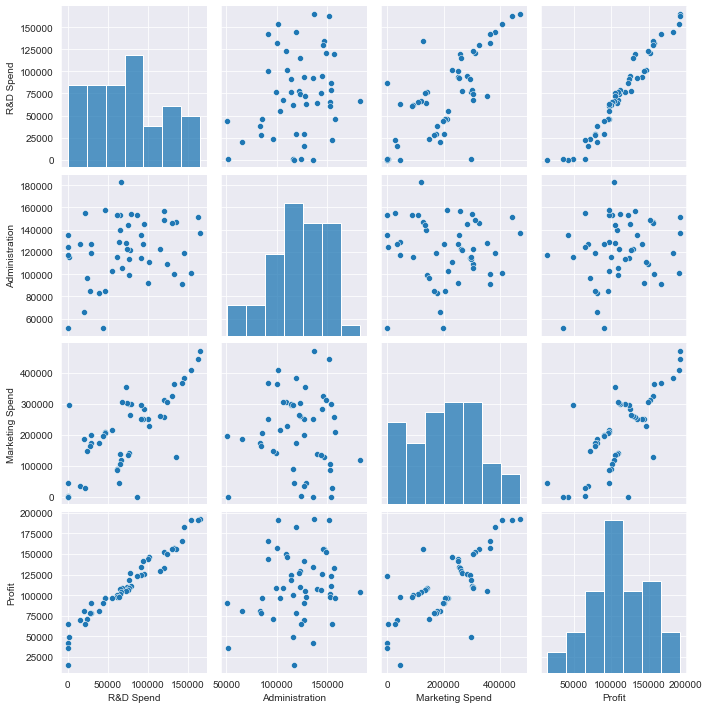

In [10]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# preparing a model

In [11]:
data2=data1.rename({'R&D Spend':'rds','Administration':'admin','Marketing Spend':'mks','Profit':'profit'},axis=1)
data2

,rds,admin,mks,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
import statsmodels.formula.api as smf 
model = smf.ols('profit~rds+admin+mks',data=data2).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        16:44:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
mks            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Coefficients
model.params

Intercept    50122.192990
rds              0.805715
admin           -0.026816
mks              0.027228
dtype: float64

In [15]:
#t and p-Values
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
rds          17.846374
admin        -0.525507
mks           1.655077
dtype: float64 
 Intercept    1.057379e-09
rds          2.634968e-22
admin        6.017551e-01
mks          1.047168e-01
dtype: float64


In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

## Simple Linear Regression Models

In [17]:
ml_a=smf.ols('profit~admin',data = data2).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept    3.040044
admin        1.419493
dtype: float64 
 Intercept    0.003824
admin        0.162217
dtype: float64


In [18]:
ml_m=smf.ols('profit~mks',data = data2).fit()  
#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept    7.808356
mks          7.802657
dtype: float64 
 Intercept    4.294735e-10
mks          4.381073e-10
dtype: float64


In [19]:
ml_am=smf.ols('profit~admin+mks',data = data2).fit()  
#t and p-Values
print(ml_am.tvalues, '\n', ml_am.pvalues)  

Intercept    1.142741
admin        2.467779
mks          8.281039
dtype: float64 
 Intercept    2.589341e-01
admin        1.729198e-02
mks          9.727245e-11
dtype: float64


# Calculating VIF

In [20]:
rsq_rds = smf.ols('rds~admin+mks',data=data2).fit().rsquared  
vif_rds = 1/(1-rsq_rds) 

rsq_admin = smf.ols('admin~rds+mks',data=data2).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_mks = smf.ols('mks~rds+admin',data=data2).fit().rsquared  
vif_mks = 1/(1-rsq_mks) 



# Storing vif values in a data frame
d1 = {'Variables':['rds','admin','mks'],'VIF':[vif_rds,vif_admin,vif_mks]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rds,2.468903
1,admin,1.175091
2,mks,2.326773


### Residual Analysis

In [46]:
## Test for Normality of Residuals (Q-Q Plot)

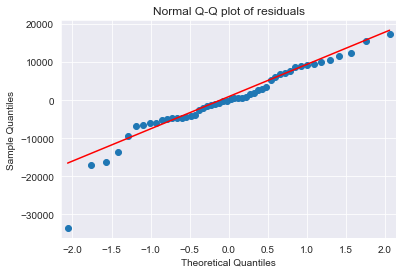

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

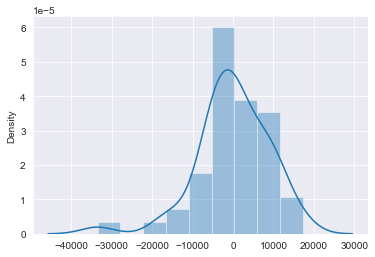

In [23]:
sns.distplot(model.resid)

## Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values( vals ): return (vals - vals.mean())/vals.std()

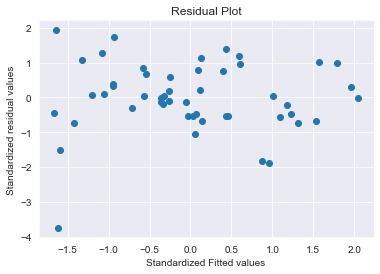

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


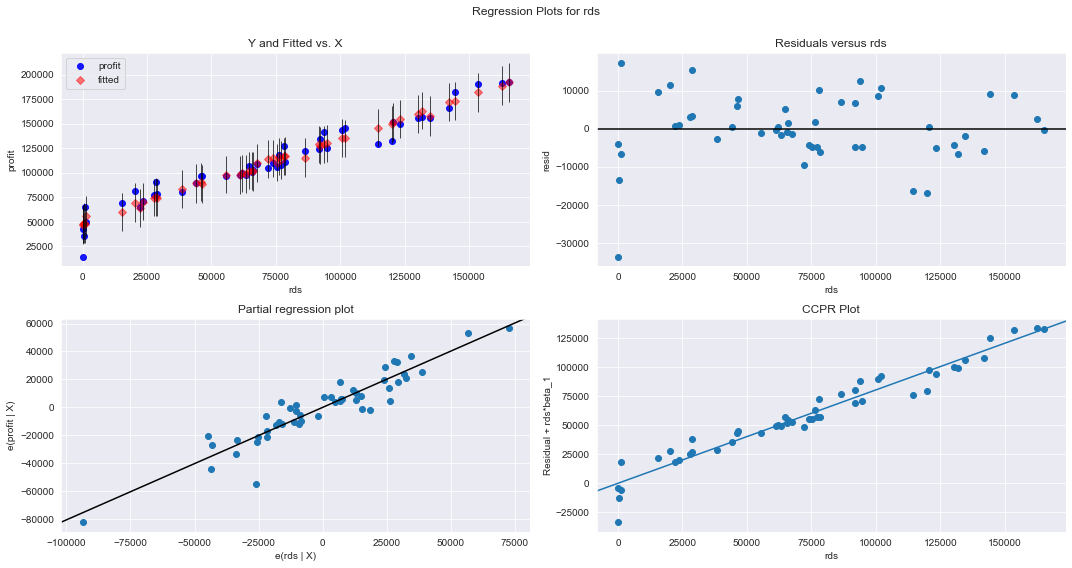

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rds", fig=fig)
plt.show()

eval_env: 1


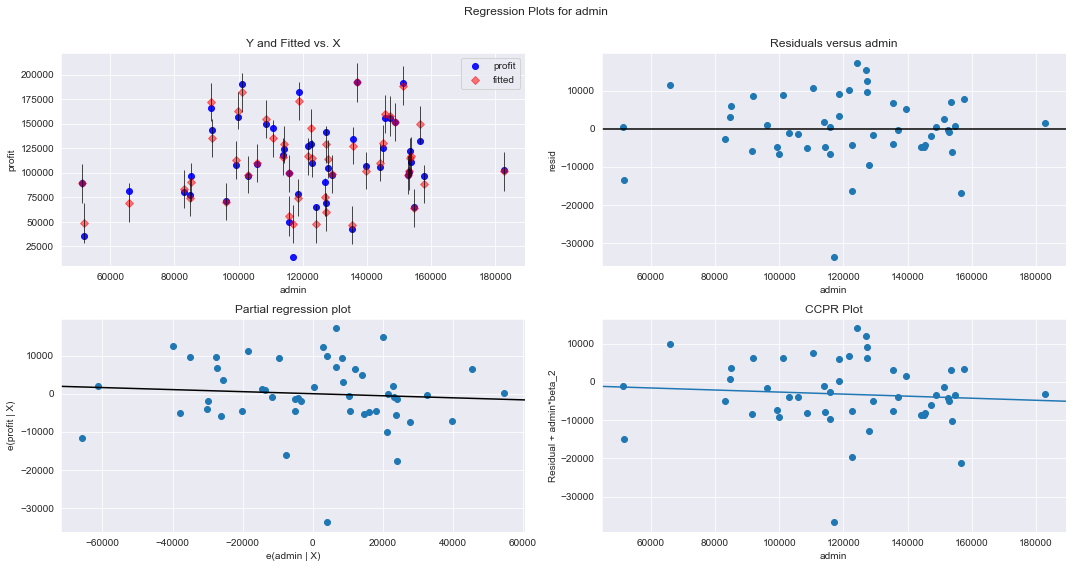

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

eval_env: 1


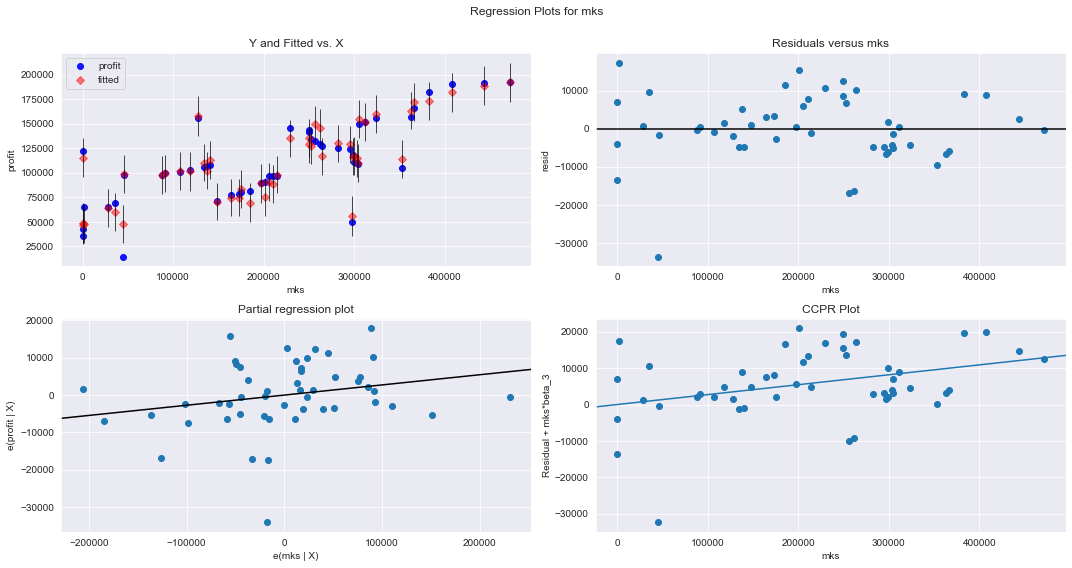

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mks", fig=fig)
plt.show()

# Model Deletion Diagnostics

## 1)Cook distance
Detecting Influencers/Outliers

In [29]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [30]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

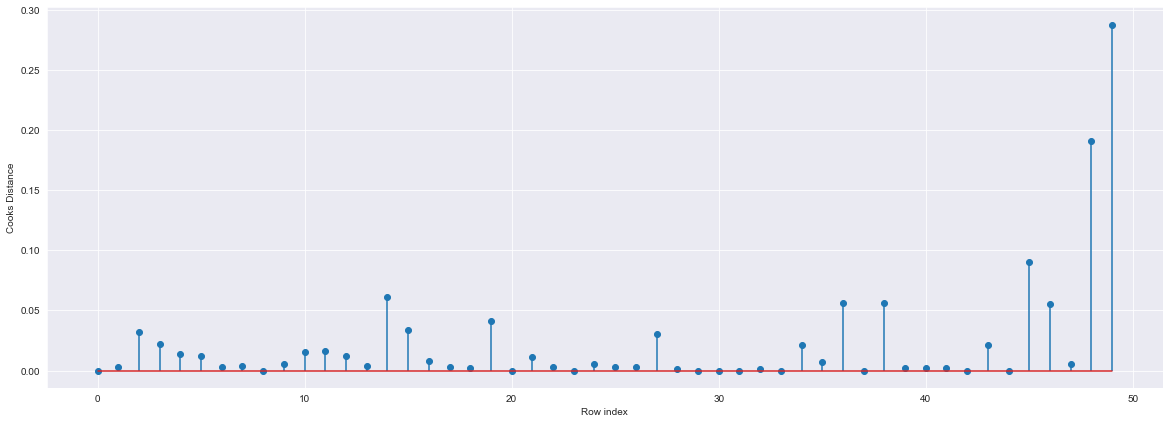

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

## 2)High Influence points

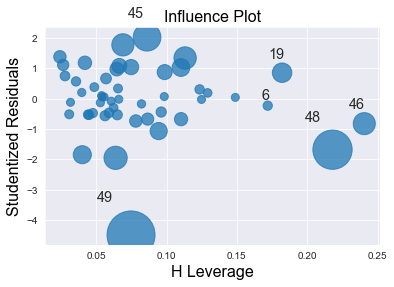

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.36

In [35]:
data2[data2.index.isin([49])] 

,rds,admin,mks,State,profit
49,0.0,116983.8,45173.06,California,14681.4


In [36]:
data2.head()

,rds,admin,mks,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Improving the model

In [37]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data3=data2.drop(data2.index[[49]],axis=0).reset_index(drop=True)
data3

,rds,admin,mks,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


##  Final Model

In [38]:
#Exclude variable "Profit" and generate R-Squared and AIC values
final_ml= smf.ols('profit~rds+admin+mks',data = data3).fit()

In [39]:
model_influence_P = final_ml .get_influence()
(c,_) = model_influence_P.cooks_distance


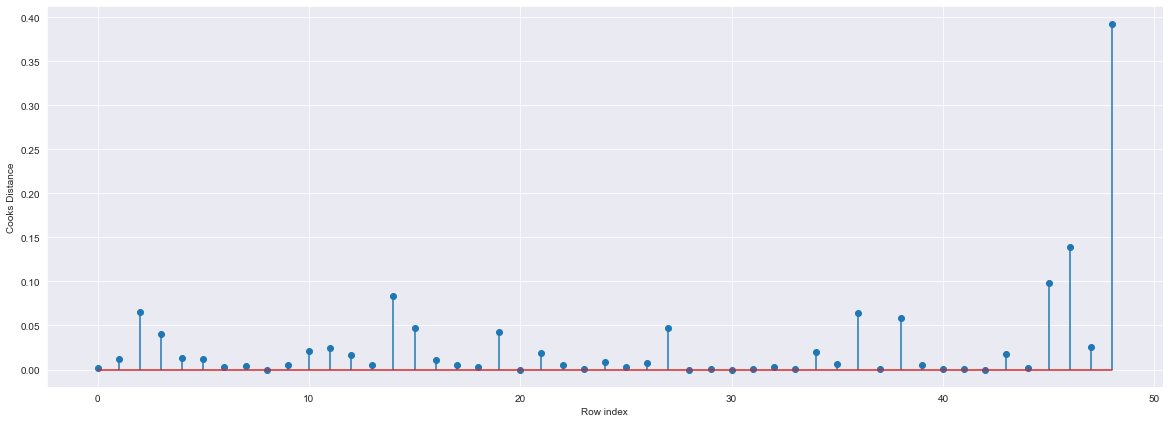

In [40]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [41]:
(final_ml.rsquared,final_ml.aic)

(0.9613162435129847, 1020.5652974526367)

## Predicting for new data

In [42]:
data_n=pd.DataFrame({'rds':60000,"admin":100000,"mks":150000},index=[0])
data_n

,rds,admin,mks
0,60000,100000,150000


In [43]:
final_ml.predict(data_n)

0    100927.458632
dtype: float64

In [44]:
pred_y=final_ml.predict(data_n)
pred_y

0    100927.458632
dtype: float64

In [45]:
data = {'Model': [model.rsquared],'Final_Model': [final_ml.rsquared]}
df = pd.DataFrame(data)
df.index = ['Rsquared']
df

,Model,Final_Model
Rsquared,0.950746,0.961316
